In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station





In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)


## D1: Determine the Summary Statistics for June


In [19]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = '06'
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == date_str).all()


[<sqlalchemy.ext.automap.measurement object at 0x11f145690>, <sqlalchemy.ext.automap.measurement object at 0x11f145750>, <sqlalchemy.ext.automap.measurement object at 0x11f1457d0>, <sqlalchemy.ext.automap.measurement object at 0x11f145850>, <sqlalchemy.ext.automap.measurement object at 0x11f1458d0>, <sqlalchemy.ext.automap.measurement object at 0x11f145990>, <sqlalchemy.ext.automap.measurement object at 0x11f145a10>, <sqlalchemy.ext.automap.measurement object at 0x11f145a90>, <sqlalchemy.ext.automap.measurement object at 0x11f145b10>, <sqlalchemy.ext.automap.measurement object at 0x11f145950>, <sqlalchemy.ext.automap.measurement object at 0x11f145bd0>, <sqlalchemy.ext.automap.measurement object at 0x11f145c50>, <sqlalchemy.ext.automap.measurement object at 0x11f145cd0>, <sqlalchemy.ext.automap.measurement object at 0x11f145d50>, <sqlalchemy.ext.automap.measurement object at 0x11f145dd0>, <sqlalchemy.ext.automap.measurement object at 0x11f145e50>, <sqlalchemy.ext.automap.measurement obj

In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_date_str = '12'
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == dec_date_str).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns = ['Dec Temps'])
dec_temps_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12263b890>,
 'caps': [<matplotlib.lines.Line2D at 0x122645150>,
 'boxes': [<matplotlib.lines.Line2D at 0x12263b490>],
 'medians': [<matplotlib.lines.Line2D at 0x122645a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x122645e50>],
 'means': []}

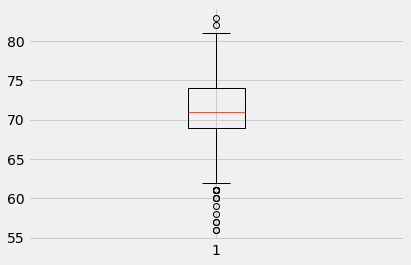

In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
pyplot.boxplot(dec_temps_df)


In [82]:
# Create Query to filter for June Precipitation
june_prcp = session.query(Measurement).filter(extract('month', Measurement.date) == date_str).all()

#Convert June Prcp and dates to lists
june_prcp_list = [rain.prcp for rain in june_prcp]
june_date_list = [day.date for day in june_prcp]

In [85]:
#create dataframe 
june_prcp_df = pd.DataFrame(june_prcp_list, june_date_list, columns = ['June Precipitation']).sort_index()
june_prcp_df.head()

,June Precipitation
2010-06-01,0.00
2010-06-01,0.01
2010-06-01,0.00
2010-06-01,NaN
2010-06-01,0.03


In [86]:
#June Precpitation Stats
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:>

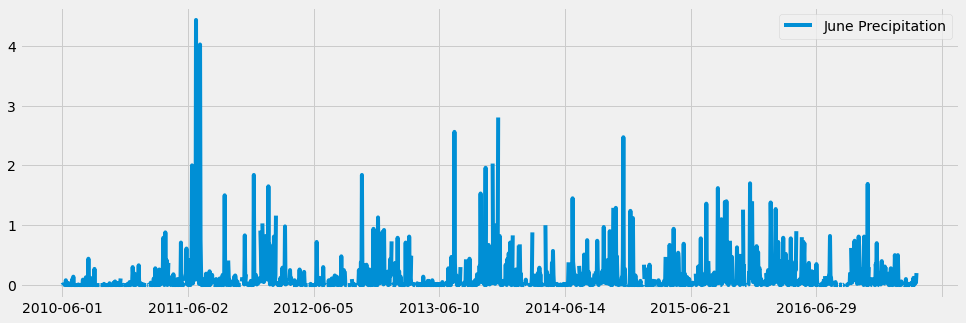

In [87]:
june_prcp_df.plot(figsize=(15,5))

In [73]:
# Create Query to filter for December Precipitation

dec_prcp = session.query(Measurement).filter(extract('month', Measurement.date) == dec_date_str).all()

#Convert Dec Prcp and dates to lists
dec_prcp_list = [rain.prcp for rain in dec_prcp]
dec_date_list = [day.date for day in dec_prcp]

In [79]:
#create dataframe 
dec_prcp_df = pd.DataFrame(dec_prcp_list, dec_date_list, columns = ['Dec Precipitation']).sort_index()

dec_prcp_df.head()

,Dec Precipitation
2010-12-01,0.04
2010-12-01,0.03
2010-12-01,0.70
2010-12-01,0.03
2010-12-01,1.35


In [80]:
dec_prcp_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:>

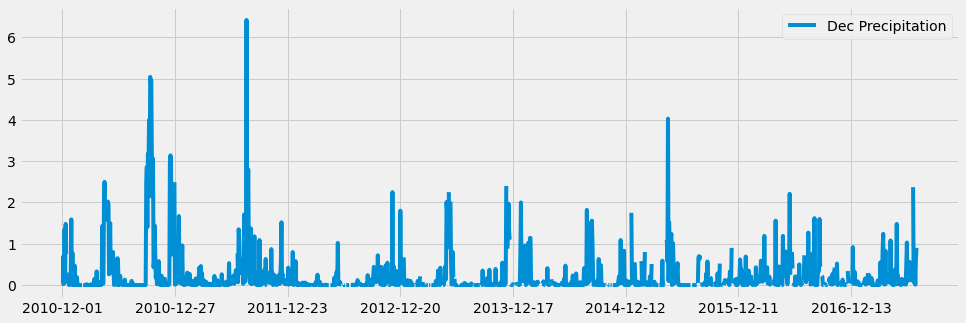

In [81]:
dec_prcp_df.plot(figsize =(15,5))

In [90]:
#Total Rain Fall in Dec
dec_prcp_df['Dec Precipitation'].sum()

304.63

In [92]:
#Total Rain Fall in June
june_prcp_df['June Precipitation'].sum()

214.63